In [1]:
# 📦 Step 1: Import Libraries
import json
import matplotlib.pyplot as plt
import os


In [2]:

# 📂 Step 2: Load JSON Data
# Make sure the file 'results.json' is in the same directory as this notebook
file_path = 'rl_vs_autotuner_comparison_results.json'

with open(file_path, 'r') as f:
    data = json.load(f)


In [20]:
# ✅ Step 3: Extract Differences (Use numeric IDs for labels)
tflops_diff = []
vram_diff = []
runtime_diff = []
size_map = []  # Mapping from ID to actual [M, N, K]

for idx, entry in enumerate(data["results"]):
    rl = entry["rl_agent"]
    at = entry["autotuner"]

    tflops_diff.append(rl["tflops"] - at["tflops"])
    vram_diff.append(rl["vram_mb"] - at["vram_mb"])
    runtime_diff.append(rl["runtime_ms"] - at["runtime_ms"])
    size_map.append(str(entry["size"]))  # for reference later

# ✅ x_labels should be exactly the same length
x_labels = list(range(len(tflops_diff)))



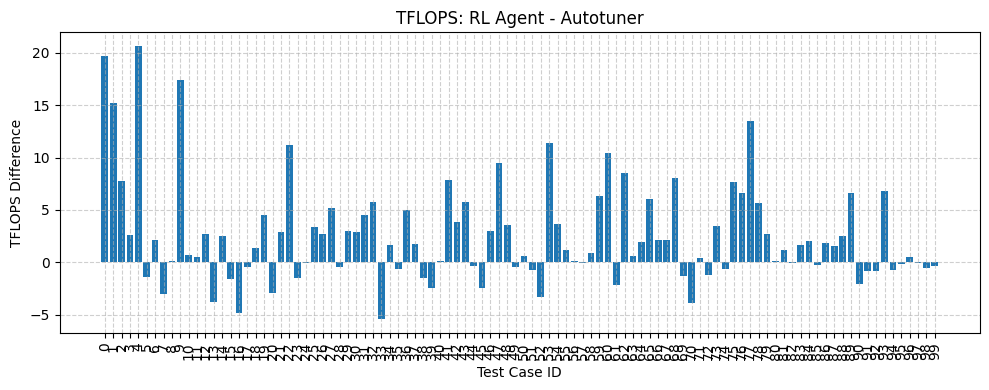

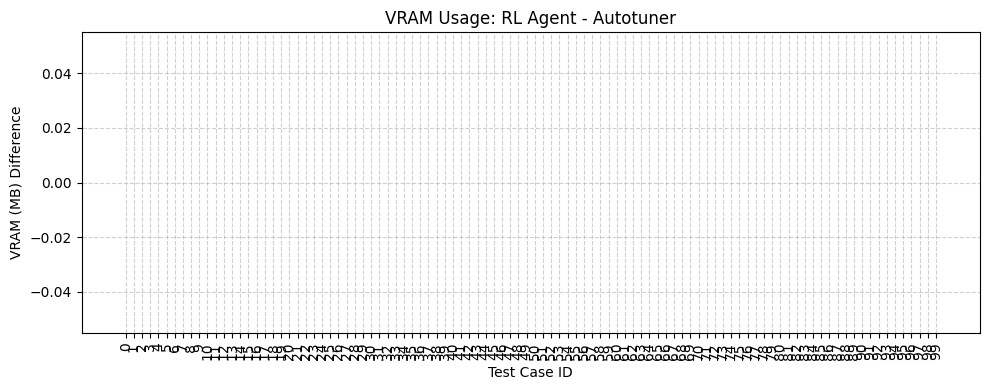

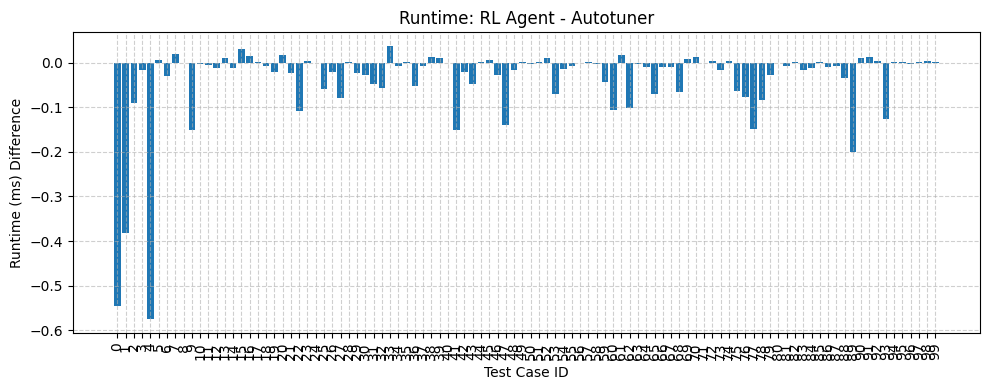

In [25]:

# Step 4: Define Plotting Function
def plot_metric(diffs, ylabel, title):
    x = list(range(len(diffs)))  # x must match len(diffs)
    plt.figure(figsize=(15, 4))
    plt.bar(x, diffs)
    plt.xticks(x, x, rotation=90)
    plt.xlabel("Test Case ID")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



# Step 5: Plot TFLOPS Difference
plot_metric(tflops_diff, "TFLOPS Difference", "TFLOPS: RL Agent - Autotuner")

# Step 6: Plot VRAM Difference
plot_metric(vram_diff, "VRAM (MB) Difference", "VRAM Usage: RL Agent - Autotuner")

#  Step 7: Plot Runtime Difference
plot_metric(runtime_diff, "Runtime (ms) Difference", "Runtime: RL Agent - Autotuner")